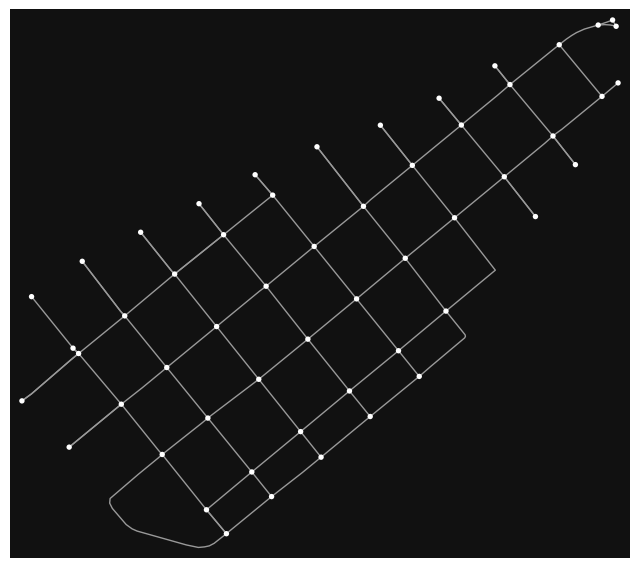

Nodos disponibles en el grafo:
306533658
306533880
306533894
306533910
306533915
306533936
306533941
306533954
306533955
306533962
306533979
306534005
306534010
632136931
632155676
632155694
632157921
632157941
632158954
632158964
632167236
632167239
632167243
632167246
632177034
632177037
632177908
632177909
632177919
632178130
632178139
632178232
632178963
632178969
632178979
632179384
632179390
632179398
632179474
2728252148
2728252149
2728252150
3017166519
3021475228
3021496649
3042136180
3042136181
3042136182
3042136183
3042136184
3962362761
3962362764
9993760455
9993773477
Al menos uno de los nodos de origen o destino no existe en el grafo.


In [2]:
import osmnx as ox
import networkx as nx
import folium

# Obtener el grafo del distrito de La Punta en Lima, Perú
place_name = "La punta, Lima, Perú"
graph = ox.graph_from_place(place_name, network_type="drive")

# Coordenadas de origen (ejemplo)
orig_coord = (-12.071320, -77.165400)

# Obtener el nodo más cercano a la ubicación de origen
source_node = ox.distance.nearest_nodes(graph, orig_coord[1], orig_coord[0])

# Obtener el subgrafo conexo más grande
largest_subgraph = max(nx.strongly_connected_components(graph), key=len)

# Crear un grafo dirigido que contenga solo los nodos del subgrafo conexo más grande
subgraph = graph.subgraph(largest_subgraph)

# Calcular una ruta aproximada que pase por todos los nodos posibles y regrese al origen
route = list(nx.dfs_preorder_nodes(subgraph, source=source_node))

# Agregar el nodo de origen al final de la ruta para regresar al punto de partida
route.append(route[0])

# Crear un mapa centrado en el lugar
m = folium.Map(location=[orig_coord[0], orig_coord[1]], zoom_start=15, control_scale=True)

# Dibujar los nodos y las aristas del grafo en el mapa
folium.features.GeoJson(ox.graph_to_gdfs(graph, edges=False).to_json()).add_to(m)

# Dibujar la ruta en el mapa
edges = list(zip(route, route[1:]))
for u, v in edges:
    folium.PolyLine(locations=[(graph.nodes[u]['y'], graph.nodes[u]['x']), (graph.nodes[v]['y'], graph.nodes[v]['x'])],
                    color='red').add_to(m)

# Guardar el mapa en un archivo HTML
m.save('map.html')


In [3]:
import csv

# Obtener todos los nodos de la ciudad de La Punta
nodes = list(subgraph.nodes())

# Crear un archivo CSV
with open('coordenadas.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Escribir la cabecera del archivo CSV
    writer.writerow(['latitud', 'longitud'])

    # Escribir las coordenadas de los nodos en el archivo CSV
    for node in nodes:
        lat = graph.nodes[node]['y']
        lon = graph.nodes[node]['x']
        writer.writerow([lat, lon])

print("Archivo CSV creado exitosamente.")


Archivo CSV creado exitosamente.


KeyboardInterrupt: 